In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
myset = pd.read_csv("insurance.csv")

xVar = myset["bmi"].values
yVar = myset["charges"].values

Part 1: cost function (MSE)

In [8]:
def cost_function(x, y, w, b):
    cost_sum = 0
    for i in range(len(x)):
        cost = ((w * x[i] + b) - y[i]) ** 2
        cost_sum += cost
    
    total_cost = cost_sum * (1/(2*len(x)))
    return total_cost

Part 2: Derivatives of cost

In [9]:
def gradient_function(x,y,w,b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w*x[i] + b

        dc_dw += ((f-y[i])*x[i]) * (1/m)
        dc_db += (f-y[i]) * (1/m)

    return dc_dw, dc_db

Part 3: Descent function to find minimum

In [14]:
def gradient_descent(x,y, alpha, iter):
    w = 0
    b = 0

    for i in range(iter):
        dw, db = gradient_function(x, y, w, b)
        w = w - (alpha * dw)
        b = b -(alpha * db)
        print(f"iteration{i}: cost {cost_function(x, y, w, b)}")
    return w, b

getting slope and intercept values for imported training set

In [33]:
al = .002
it = 10000
final_w, final_b = gradient_descent(xVar, yVar, al, it)

iteration9982: cost 70394752.27253824
iteration9983: cost 70394751.39105651
iteration9984: cost 70394750.50970863
iteration9985: cost 70394749.62849468
iteration9986: cost 70394748.74741462
iteration9987: cost 70394747.86646855
iteration9988: cost 70394746.98565602
iteration9989: cost 70394746.1049774
iteration9990: cost 70394745.22443283
iteration9991: cost 70394744.3440216
iteration9992: cost 70394743.4637445
iteration9993: cost 70394742.58360097
iteration9994: cost 70394741.70359111
iteration9995: cost 70394740.82371491
iteration9996: cost 70394739.94397253
iteration9997: cost 70394739.06436379
iteration9998: cost 70394738.1848885
iteration9999: cost 70394737.305547


411.18366800110266 641.177448560647


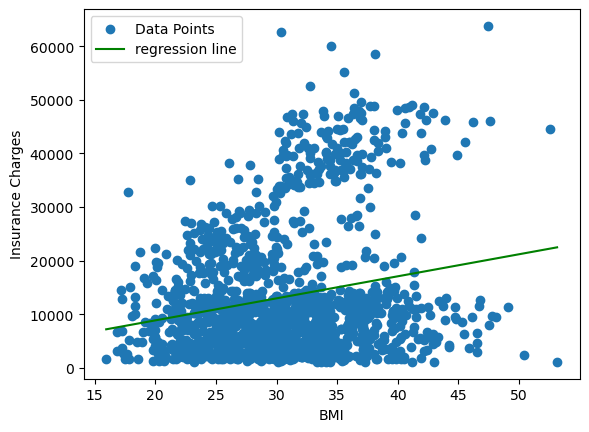

In [35]:
print(final_w, final_b)

plt.scatter(xVar, yVar, label = 'Data Points')

x_vals = np.linspace(min(xVar), max(xVar), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color = 'green', label = 'regression line')

plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.legend()
plt.show()